Iter. 0, err = 4.5812e-01, res = 2.2361e+00
Iter. 1, err = 1.7556e-01, res = 4.5698e-01
Iter. 2, err = 3.9226e-02, res = 4.3315e-02
Iter. 3, err = 2.6921e-03, res = 1.7673e-03
Iter. 4, err = 1.3002e-05, res = 9.6127e-06
Iter. 5, err = 2.9491e-10, res = 2.2046e-10
Iter. 6, err = 2.4285e-16, res = 2.2204e-16
Converged, exiting...


The solution is:
 [[0.86406221]
 [0.34086698]]
x1 = 0.86406221, x2 = 0.34086698


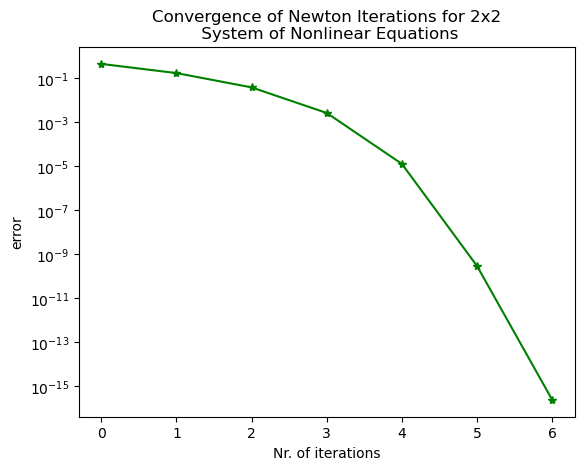

In [2]:
# script for Question 1 of Assignment #4
#   for solving system of nonlinear equations using Newton's method

import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt          # For plotting 

from NewtSysSolve import NewtSysSolve
from NonLinEqnsA4 import NonLinEqns
from JacobianA4 import Jacobian


# Set parameters for Newton iterations
epsf = 1.0e-9
epsx = 1.0e-12
itmx = 15
# Initial guess
x0 = np.ones((2,1))

#  call Newton iteration function NewtSysSolve defined in NewtSysSolve.py
x, err, res, its  = NewtSysSolve(NonLinEqns,Jacobian,x0,epsx,epsf,itmx)


#  print solution
print('\n')
print('The solution is:\n', str(x))
print(f'x1 = {x[0,0]:.8f}, x2 = {x[1,0]:.8f}')


# create a plot showing convergence of the Newton iterations 
#   don't forget to label plot appropriately

plt.figure
plt.semilogy(range(0,its),err[0:its],'-*g')
#plt.semilogy(range(0,its),res[0:its],'-*r')
plt.xlabel('Nr. of iterations')
plt.ylabel('error')
plt.title('Convergence of Newton Iterations for 2x2\n System of Nonlinear Equations')
plt.show()



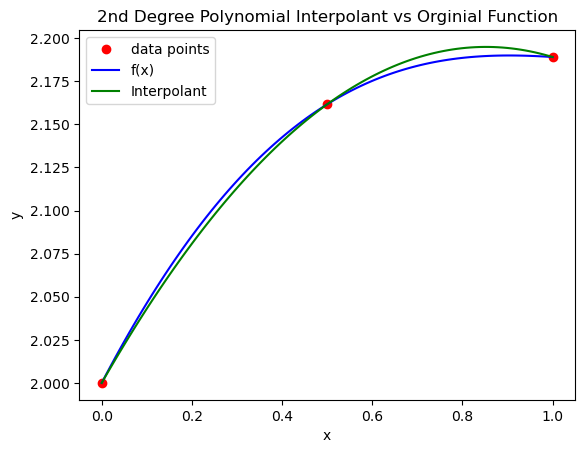

[-0.26838476  0.45740834  2.        ]


In [3]:
# polynomial interpolation

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from scipy.interpolate import BarycentricInterpolator

def f(x):
    return np.exp(x/2)+np.cos(x)

# data: (1,1),(2,0.3),(3,0.6),(4,0.1)  ->  n = 3

x = np.array([0.0,0.5,1.0])
y = f(x)

#  use built-in scipy function to find interpolant
Q_N = BarycentricInterpolator(x,y)   # Q_N  is a Python function for the interpolant

xx = np.linspace(0,1,num=100,endpoint=True)
yy = f(xx)                        #  evaluate the interpolate at values from xx

#  use Vandermonde matrix to find interpolant
V = np.vander(x)
a_coeff = scipy.linalg.solve(V,y)    #  gives coefficients of the polynomial interpolant

# evaluate the interpolant at values from xx;
#   note the order in which a_ceoff stores coefficients when we use np.vander to get Vandermonde matrix
yy2 = a_coeff[0]*xx**2 + a_coeff[1]*xx + a_coeff[2]

#  the two polynomial interpolants (i.e yy and yy2) are the same (because the interpolant is unique)
plt.plot(x, y, 'ro', label='data points')
plt.plot(xx, yy, '-b', label='f(x)')
plt.plot(xx, yy2, '-g', label='Interpolant')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2nd Degree Polynomial Interpolant vs Orginial Function')
plt.legend()
plt.show()

print(a_coeff)



5.551115123125783e-17


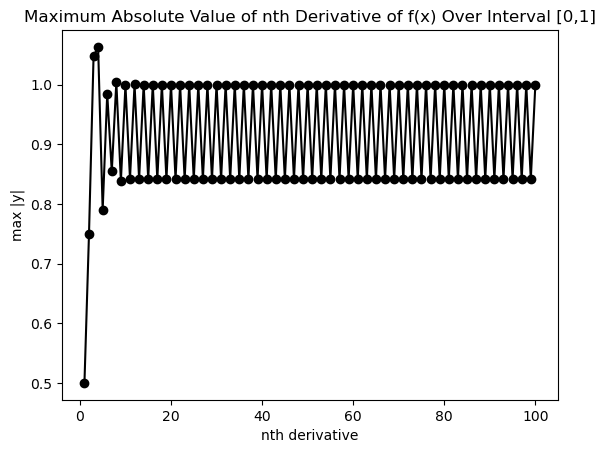

In [6]:
import numpy as np

def f(k,x):
    trig = 0
    if(k%4==1):
        trig = (-1)*np.sin(x)
    elif (k%4==2):
        trig = (-1)*np.cos(x)
    elif (k%4==3):
        trig = np.sin(x)
    elif (k%4==0):
        trig = np.cos(x)
    
    return (1/(2**k))*np.exp(x/2) + trig

yy=[]

for k in range(1,101):

    interval = np.linspace(0,1,10000,endpoint=True)
    
    temp = []
    for x in interval:
        temp.append(abs(f(k,x)))
    
    yy.append(np.max(temp))
    
print(1/(2**54))

plt.plot(range(1,101), yy, '-ko')
plt.xlabel('nth derivative')
plt.ylabel('max |y|')
plt.title('Maximum Absolute Value of nth Derivative of f(x) Over Interval [0,1]')
plt.show()
    

In [ ]:

#  Contructs the matrix M for solving for coefficients 
#   of polynomial interpolant using Newton polynomial basis

import numpy as np

def NewtonPolyBuild(xs):     # input numpy array containing x values of interpolating nodes
    
   # code for constructing the matrix M
   
   #finding the value of the dimension n+1 and initialising a square matrix M with n+1 rows and n+1 columns of zeros
   np1 = np.shape(xs)[0]
   M = np.zeros((np1,np1))
   
   for i in range(0,np1):
       M[i,0] = 1
       for j in range(1,i+1):
           M[i,j] = M[i,j-1] * (xs[i] - xs[j-1])
    
   return M          # return numpy array with matrix M 

print(NewtonPolyBuild([0,1,2,3,4,5]))

[[  1.   0.   0.   0.   0.   0.]
 [  1.   1.   0.   0.   0.   0.]
 [  1.   2.   2.   0.   0.   0.]
 [  1.   3.   6.   6.   0.   0.]
 [  1.   4.  12.  24.  24.   0.]
 [  1.   5.  20.  60. 120. 120.]]


In [ ]:
#  Evaluates polynomial interpolant constructed from Newton polynomial basis 

import numpy as np


def NewtonPolyEval(a,xs,xx):    # input:  a (numpy array containing coefficients of interpolating polynomial
                                #             written in terms of the Newton polynomial basis)
                                #         xs (numpy array containing x values of interpolating nodes)
                                #         xx (numpy array containing x values at which interpolant is to be evaluated)
    
    # code for evaluating interpolant
    
    np1=np.shape(a)[0]
    
    yy=np.full((len(xx),),a[np1-1])
    
    for i in range(len(xx)):
        for j in range(np1-2,-1,-1):
            yy[i] = yy[i]*(xx[i]-xs[j]) + a[j]
           
       
        
    return yy                   # return numpy array containing values for interpolant evaluated xx

10
9
8
7
6
5
4
3
2


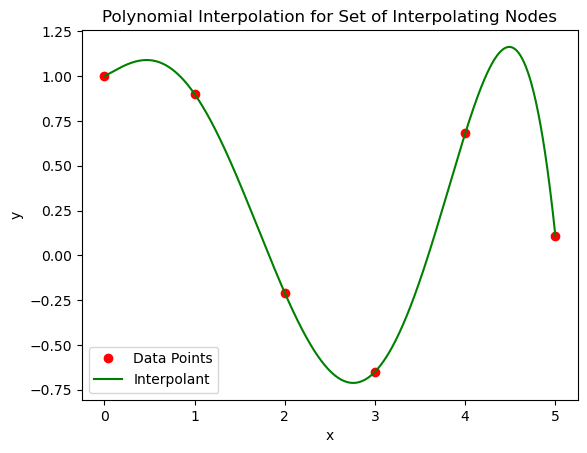

[-0.26838476  0.45740834  2.        ]


In [ ]:
# script for Question 3 of Assignment #4
#   for polynomial interpolation using the Newton polynomial basis

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

from NewtonPolyBuildA4 import NewtonPolyBuild
from NewtonPolyEvalA4 import NewtonPolyEval


#  enter data points
xs = np.array([0,1.0,2.0,3.0,4.0,5.0])
ys = np.array([1.00,0.90,-0.21,-0.65,0.68,0.11])

#  Call NewtonPolyBuild for contructing matrix M
M = NewtonPolyBuild(xs)

#  Solve system of equations to find coefficients of interpolant
a = scipy.linalg.solve(M,ys)

#  Call NewtonPolyEval to get values for plotting
xx = np.linspace(0,5,1000,endpoint=True)
yy = NewtonPolyEval(a,xs,xx)

#  plot data and interpolant
#   don't forget to label plot appropriately
plt.plot(xs, ys, 'ro', label='Data Points')
plt.plot(xx, yy, '-g', label='Interpolant')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Interpolation for Set of Interpolating Nodes')
plt.legend()
plt.show()

print(a_coeff)
